IMPORTING THE REQUIRED LIBRARIES

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


IMPORTING THE DATASET

In [229]:
filepath=r'Dataset .csv'
dataset=pd.read_csv(filepath)

FINDING AND TAKING CARE OF NULL VALUES

In [230]:
missing_summary = dataset.isnull().sum()
print(missing_summary)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [231]:
dataset.shape

(9551, 21)

In [232]:
dataset= dataset.dropna()

In [233]:
missing_summary = dataset.isnull().sum()
print(missing_summary)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [234]:
dataset.shape

(9542, 21)

DROPING NON REQUIRED FEATURES 

In [235]:
dataset = dataset.drop(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Locality', 'Address', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Currency'], axis=1)

In [236]:
dataset.shape

(9542, 10)

ENCODING THE CATEGORICAL DATA

In [237]:
from sklearn.preprocessing import LabelEncoder
categorical_features = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']
encoder = LabelEncoder()
for col in categorical_features:
    dataset[col] = encoder.fit_transform(dataset[col])

FINDING CORELATION BETWEEN THE DATA

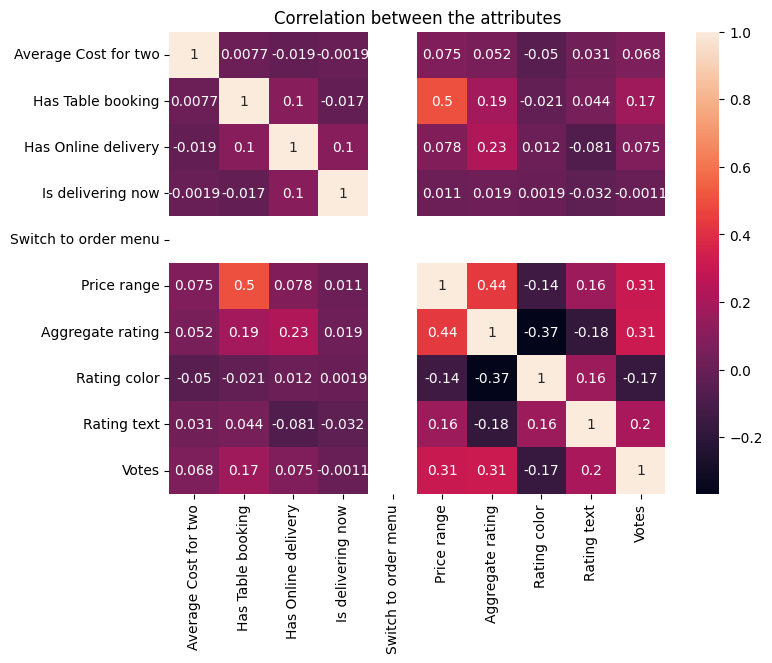

In [249]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(),annot=True)
plt.title("Correlation between the attributes")
plt.show()

In [238]:
X = dataset.drop(['Aggregate rating',], axis=1)
Y = dataset['Aggregate rating']

DATA SPLITTING 

In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

TRAINING THE DECISION TREE REGRESSOR MODEL

In [240]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

TRAINING THE RANDOM FOREST REGRESSOR MODEL

In [241]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

ACCURACY OF DECISION TREE REGRESSOR MODEL & GRAPH

In [242]:
from sklearn.metrics import mean_squared_error, r2_score
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print(f'Decision Tree MSE: {dt_mse}')
print(f'Decision Tree R-squared: {dt_r2}')

Decision Tree MSE: 0.057306458969495516
Decision Tree R-squared: 0.9749421494499617


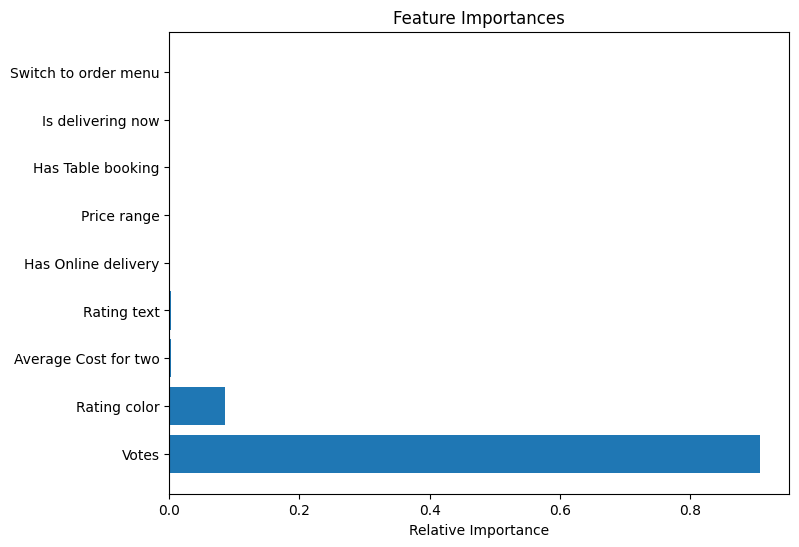

In [246]:
importances = dt_model.feature_importances_
feature_names = dataset.columns 
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

ACCURACY OF RANDOM FOREST REGRESSOR MODEL & GRAPH

In [244]:
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f'Decision Tree MSE: {rf_mse}')
print(f'Decision Tree R-squared: {rf_r2}')

Decision Tree MSE: 0.03865512790756972
Decision Tree R-squared: 0.983097639681138


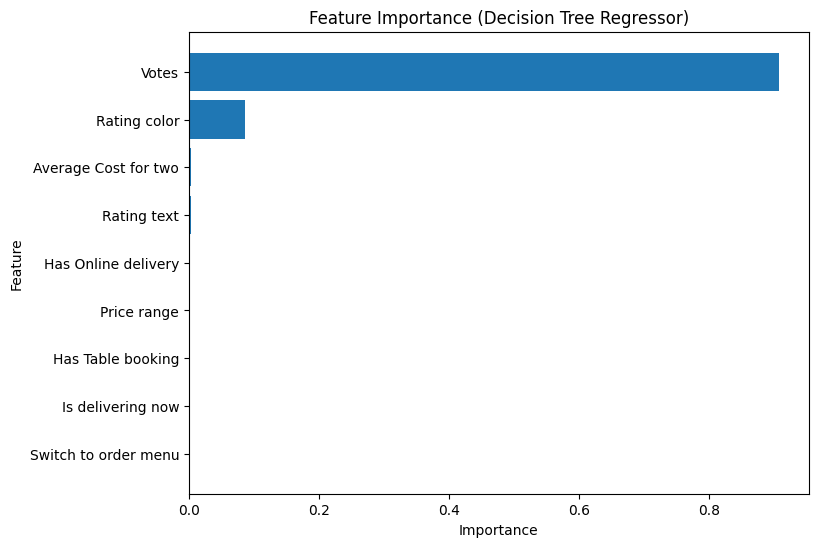

In [247]:
importances2 = rf_model.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Decision Tree Regressor)')
plt.gca().invert_yaxis()
plt.show()